In [1]:
#https://stackoverflow.com/questions/35215161/most-efficient-way-to-map-function-over-numpy-array

import timeit
import numpy as np

f = lambda x: x ** 2
vf = np.vectorize(f)
uf=np.frompyfunc(f, 1, 1)

def test_direct(x, n):
    t = timeit.timeit(
        'f(x)',
        'from __main__ import x, f', number=n)
    print('direct: {0:.3f}'.format(t))

def test_vectorized(x, n):
    t = timeit.timeit(
        'vf(x)',
        'from __main__ import x, vf', number=n)
    print('vectorized: {0:.3f}'.format(t))

def test_ufunc(x, n):
    t = timeit.timeit(
        'uf(x)',
        'from __main__ import x, uf', number=n)
    print('universal: {0:.3f}'.format(t))

In [2]:
x = np.arange(1000)
n = 10000
test_direct(x, n)      # 0.007
test_vectorized(x, n)  # 0.945
test_ufunc(x,n)


direct: 0.052
vectorized: 4.732
universal: 4.104


In [3]:
x = np.arange(1000)
n = 10000
t = timeit.timeit(
        'for i in range(len(x)): x[i]=f(x[i])',
        'from __main__ import np, x, f', number=n)
print('t: {0:.3f}'.format(t))

t: 5.232


In [4]:
L=4
base=np.arange(L*L,dtype=np.double).reshape([L,L])
print(base)

[[ 0.  1.  2.  3.]
 [ 4.  5.  6.  7.]
 [ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]


In [5]:
"""ravel y unravel son cosas que se hacen tipicamente en lattices cuando se usa C"""
np.unravel_index(6,base.shape)

(1, 2)

In [6]:
np.unravel_index(6,(3,3,3))

(0, 2, 0)

In [7]:
np.ravel_multi_index((1,2),base.shape)

6

In [8]:
np.ravel_multi_index((2,4),base.shape,mode='wrap')

8

In [9]:
np.unravel_index(range(27),(3,3,3))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
        2, 2, 2, 2, 2]),
 array([0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1,
        1, 1, 2, 2, 2]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 0,
        1, 2, 0, 1, 2]))

In [10]:
[np.unravel_index(i,(3,3,3)) for i in range(27)]

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [11]:
L=4
import numpy as np
base=(np.arange(L*L*L,dtype=np.int8)+65).reshape([L,L,L]).view('S1')    

In [12]:
base

array([[[b'A', b'B', b'C', b'D'],
        [b'E', b'F', b'G', b'H'],
        [b'I', b'J', b'K', b'L'],
        [b'M', b'N', b'O', b'P']],

       [[b'Q', b'R', b'S', b'T'],
        [b'U', b'V', b'W', b'X'],
        [b'Y', b'Z', b'[', b'\\'],
        [b']', b'^', b'_', b'`']],

       [[b'a', b'b', b'c', b'd'],
        [b'e', b'f', b'g', b'h'],
        [b'i', b'j', b'k', b'l'],
        [b'm', b'n', b'o', b'p']],

       [[b'q', b'r', b's', b't'],
        [b'u', b'v', b'w', b'x'],
        [b'y', b'z', b'{', b'|'],
        [b'}', b'~', b'\x7f', b'\x80']]], dtype='|S1')

In [13]:
zplus=np.transpose(np.unravel_index(range(L*L*L),(L,L,L)))+(0,0,1)
np.shape(zplus)

(64, 3)

In [14]:
zp=np.array([np.ravel_multi_index(i,(L,L,L),mode='wrap') for i in zplus])

In [15]:
base.take(zp).reshape((L,L,L))

array([[[b'B', b'C', b'D', b'A'],
        [b'F', b'G', b'H', b'E'],
        [b'J', b'K', b'L', b'I'],
        [b'N', b'O', b'P', b'M']],

       [[b'R', b'S', b'T', b'Q'],
        [b'V', b'W', b'X', b'U'],
        [b'Z', b'[', b'\\', b'Y'],
        [b'^', b'_', b'`', b']']],

       [[b'b', b'c', b'd', b'a'],
        [b'f', b'g', b'h', b'e'],
        [b'j', b'k', b'l', b'i'],
        [b'n', b'o', b'p', b'm']],

       [[b'r', b's', b't', b'q'],
        [b'v', b'w', b'x', b'u'],
        [b'z', b'{', b'|', b'y'],
        [b'~', b'\x7f', b'\x80', b'}']]], dtype='|S1')

In [16]:
np.char.add(base,base.take(zp).reshape((L,L,L)))

array([[[b'AB', b'BC', b'CD', b'DA'],
        [b'EF', b'FG', b'GH', b'HE'],
        [b'IJ', b'JK', b'KL', b'LI'],
        [b'MN', b'NO', b'OP', b'PM']],

       [[b'QR', b'RS', b'ST', b'TQ'],
        [b'UV', b'VW', b'WX', b'XU'],
        [b'YZ', b'Z[', b'[\\', b'\\Y'],
        [b']^', b'^_', b'_`', b'`]']],

       [[b'ab', b'bc', b'cd', b'da'],
        [b'ef', b'fg', b'gh', b'he'],
        [b'ij', b'jk', b'kl', b'li'],
        [b'mn', b'no', b'op', b'pm']],

       [[b'qr', b'rs', b'st', b'tq'],
        [b'uv', b'vw', b'wx', b'xu'],
        [b'yz', b'z{', b'{|', b'|y'],
        [b'}~', b'~\x7f', b'\x7f\x80', b'\x80}']]], dtype='|S2')

In [3]:
#https://github.com/AeroPython/basic-python-packages-for-science/blob/master/Basic%20Python%20Packages%20for%20Science.ipynb
np.linspace(0, 10, 21)


array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [5]:
np.linspace(0, 10, 21).dtype

dtype('float64')

In [7]:
np.arange(0,20,2).dtype

dtype('int64')

In [8]:
#start:stop:step
chess_board = np.zeros([8, 8], dtype=int)

chess_board[0::2, 1::2] = 1
chess_board[1::2, 0::2] = 1

chess_board

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0]])

In [10]:
"""hacer un ejempo usando .T @ (multiplicacion de matrices) linalg.inv linalg.eig"""

'hacer un ejempo usando .T @ inv eig'

In [4]:
#es realmente el dot de numpy todavia mas lento que paralelizar?
#vamos a ejecutar el ejemplo de johansson
#https://nbviewer.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-6B-HPC.ipynb
%load_ext Cython


In [5]:
# prepare some random data
N_core=12
N = 4 * N_core

M = np.random.rand(N, N)
x = np.random.rand(N)
y = np.zeros_like(x)

In [6]:
%%cython

cimport cython
cimport numpy
import numpy

@cython.boundscheck(False)
@cython.wraparound(False)
def cy_matvec(numpy.ndarray[numpy.float64_t, ndim=2] M, 
              numpy.ndarray[numpy.float64_t, ndim=1] x, 
              numpy.ndarray[numpy.float64_t, ndim=1] y):

    cdef int i, j, n = len(x)

    for i from 0 <= i < n:
        for j from 0 <= j < n:
            y[i] += M[i, j] * x[j]
            
    return y

In [7]:
# check that we get the same results
y = np.zeros_like(x)
cy_matvec(M, x, y)
np.dot(M, x) - y

array([ 3.55271368e-15,  1.77635684e-15, -3.55271368e-15, -1.77635684e-15,
        3.55271368e-15,  5.32907052e-15, -3.55271368e-15,  0.00000000e+00,
        0.00000000e+00, -5.32907052e-15,  0.00000000e+00, -1.77635684e-15,
        1.77635684e-15, -1.77635684e-15, -1.77635684e-15, -1.77635684e-15,
       -1.77635684e-15, -1.77635684e-15, -5.32907052e-15, -3.55271368e-15,
        1.77635684e-15,  0.00000000e+00, -3.55271368e-15,  3.55271368e-15,
        0.00000000e+00, -5.32907052e-15,  1.77635684e-15,  0.00000000e+00,
       -8.88178420e-15,  1.77635684e-15, -7.10542736e-15, -5.32907052e-15,
        1.77635684e-15,  0.00000000e+00, -1.77635684e-15, -3.55271368e-15,
        0.00000000e+00, -3.55271368e-15,  0.00000000e+00, -5.32907052e-15,
       -5.32907052e-15, -5.32907052e-15,  1.77635684e-15, -1.77635684e-15,
        0.00000000e+00, -1.77635684e-15, -3.55271368e-15,  3.55271368e-15])

In [8]:
%timeit numpy.dot(M, x)

3.2 µs ± 7.42 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [9]:
%timeit cy_matvec(M, x, y)

3.9 µs ± 40.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [11]:
%%cython -f -c-fopenmp --link-args=-fopenmp -c-g

cimport cython
cimport numpy
from cython.parallel import parallel
cimport openmp

@cython.boundscheck(False)
@cython.wraparound(False)
def cy_matvec_omp(numpy.ndarray[numpy.float64_t, ndim=2] M, 
                  numpy.ndarray[numpy.float64_t, ndim=1] x, 
                  numpy.ndarray[numpy.float64_t, ndim=1] y):

    cdef int i, j, n = len(x), N, r, m

    # release GIL, so that we can use OpenMP
    with nogil, parallel():
        N = openmp.omp_get_num_threads()
        r = openmp.omp_get_thread_num()
        m = n // N  #ojo, quiere usar division entera
        
        for i from 0 <= i < m:
            for j from 0 <= j < n:
                y[r * m + i] += M[r * m + i, j] * x[j]

    return y

In file included from /home/cursofis/anaconda3/lib/python3.8/site-packages/numpy/core/include/numpy/ndarraytypes.h:1944:0,
                 from /home/cursofis/anaconda3/lib/python3.8/site-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /home/cursofis/anaconda3/lib/python3.8/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /home/cursofis/.cache/ipython/cython/_cython_magic_2f6784a0bf1b8c9f319b4003c998d5aa.c:651:
/home/cursofis/anaconda3/lib/python3.8/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:17:2: warning: #warning "Using deprecated NumPy API, disable it with " "#define NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it with " \
  ^~~~~~~


In [12]:
%timeit cy_matvec_omp(M, x, y)

501 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [14]:
import time
import numpy
import multiprocessing
N_core = min(12,multiprocessing.cpu_count())
N_vec  = numpy.arange(25, 2000, 25) * N_core
duration_ref = numpy.zeros(len(N_vec))
duration_cy = numpy.zeros(len(N_vec))
duration_cy_omp = numpy.zeros(len(N_vec))

for idx, N in enumerate(N_vec):
    
    M = numpy.random.rand(N, N)
    x = numpy.random.rand(N)
    y = numpy.zeros_like(x)
    
    t0 = time.time()
    numpy.dot(M, x)
    duration_ref[idx] = time.time() - t0
    
    t0 = time.time()
    cy_matvec(M, x, y)
    duration_cy[idx] = time.time() - t0
    
    t0 = time.time()
    cy_matvec_omp(M, x, y)
    duration_cy_omp[idx] = time.time() - t0


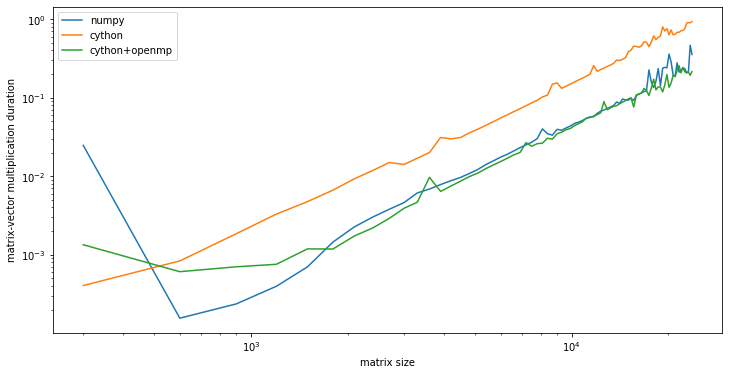

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))

ax.loglog(N_vec, duration_ref, label='numpy')
ax.loglog(N_vec, duration_cy, label='cython')
ax.loglog(N_vec, duration_cy_omp, label='cython+openmp')

ax.legend(loc=2)
ax.set_yscale("log")
ax.set_ylabel("matrix-vector multiplication duration")
ax.set_xlabel("matrix size");

La version cython aqui iguala pero no gana, salvo sorprendentemente para valores pequeños

In [25]:
import multiprocessing
#N_core = multiprocessing.cpu_count()
N_vec  = numpy.arange(2, 1000, 1)
N_vec  = numpy.append(N_vec,numpy.arange(1000, 3000, 5))
N_vec  = numpy.append(N_vec,numpy.arange(3000, 10000, 500))
N_vec =  numpy.append(N_vec,numpy.arange(10000, 40000, 1000))
duration_ref = numpy.zeros(len(N_vec))
duration_cy = numpy.zeros(len(N_vec))
duration_cy_omp = numpy.zeros(len(N_vec))

for idx, N in enumerate(N_vec):
    
    M = numpy.random.rand(N, N)
    x = numpy.random.rand(N)
    y = numpy.zeros_like(x)
    
    t0 = time.time()
    numpy.dot(M, x)
    duration_ref[idx] = time.time() - t0

    if N < 5000 or N in (1000,3000,10000):
        t0 = time.time()
        cy_matvec(M, x, y)
        duration_cy[idx] = time.time() - t0
    else:
        duration_cy[idx] = numpy.NaN
    
    t0 = time.time()
    cy_matvec_omp(M, x, y)
    duration_cy_omp[idx] = time.time() - t0


Ncores: 24


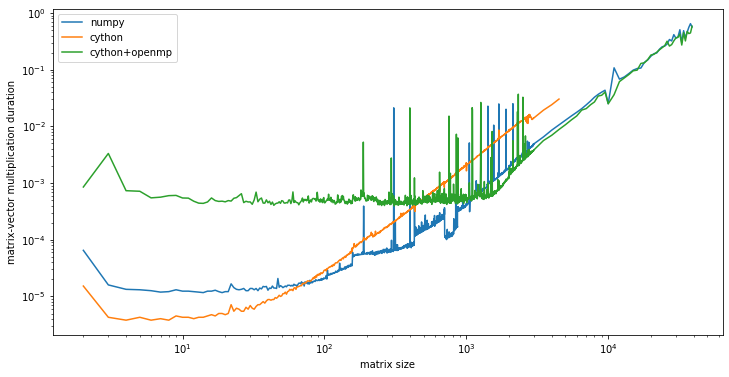

In [27]:
print("Ncores:",multiprocessing.cpu_count())
fig, ax = plt.subplots(figsize=(12, 6))

ax.loglog(N_vec, duration_ref, label='numpy')
ax.loglog(N_vec, duration_cy, label='cython')
ax.loglog(N_vec, duration_cy_omp, label='cython+openmp')

ax.legend(loc=2)
ax.set_yscale("log")
ax.set_ylabel("matrix-vector multiplication duration")
ax.set_xlabel("matrix size");